# CASA0007 Quantitative Methods Assignment 1
- Rearch title: How does social factors affect crime rate in London? (**TO BE COMFIRMED**)
- Assumptions:(**TO BE COMFIRMED**)

## Load required packages

In [90]:
# Load required libiaries
import sys
print(sys.version)
print(sys.executable)

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

import statsmodels
print(statsmodels.__version__)

3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
/opt/conda/bin/python
0.13.2


## Description of the datasets

**Area_coverage**: London by Borough Level

**Time_coverage**: 2016

**Columns**:
1. 'crime_rate', data originally from [Recorded Crime: Borough Rates](https://data.london.gov.uk/dataset/recorded_crime_rates)
2. 'population_density', data originally from [Land Area and Population Density, Ward and Borough](https://data.london.gov.uk/dataset/land-area-and-population-density-ward-and-borough)
3. 'house_price', data originally from [Average House Prices by Borough, Ward, MSOA & LSOA](https://data.london.gov.uk/dataset/average-house-prices)
4. 'earning_below_LLW', data originally from [Employees earning below the London Living Wage (LLW)](https://data.london.gov.uk/dataset/earning-below-llw)
5. 'employment_score', data originally from [Indices of Deprivation](https://data.london.gov.uk/dataset/indices-of-deprivation)

In [91]:
# Plots by Peng?

In [92]:
# Load data pre_processed
rawdata1 = pd.read_csv('https://raw.githubusercontent.com/Murphy829/CASA0007_QM_A1/main/final_dataset06122022.csv')
rawdata2 = pd.read_csv('https://raw.githubusercontent.com/Murphy829/CASA0007_QM_A1/main/data_std_nor.csv',index_col=0)
rawdata1.info()
rawdata1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                32 non-null     object 
 1   Area_name           32 non-null     object 
 2   crime_rate          32 non-null     float64
 3   population_density  32 non-null     float64
 4   house_price         32 non-null     float64
 5   earning_below_LLW   32 non-null     float64
 6   employment_score    32 non-null     float64
dtypes: float64(5), object(2)
memory usage: 1.9+ KB


,Code,Area_name,crime_rate,population_density,house_price,earning_below_LLW,employment_score
0,E09000002,Barking and Dagenham,86.5288,56.0455,245.5000,25.0000,0.1581
1,E09000003,Barnet,65.7851,43.7825,450.0000,28.3000,0.0887
2,E09000004,Bexley,52.2173,40.0078,285.0000,34.8000,0.0948
3,E09000005,Brent,80.6390,75.1402,415.0000,32.0000,0.1192
4,E09000006,Bromley,65.0656,21.6747,375.0000,27.2000,0.0864


## Scatter plots

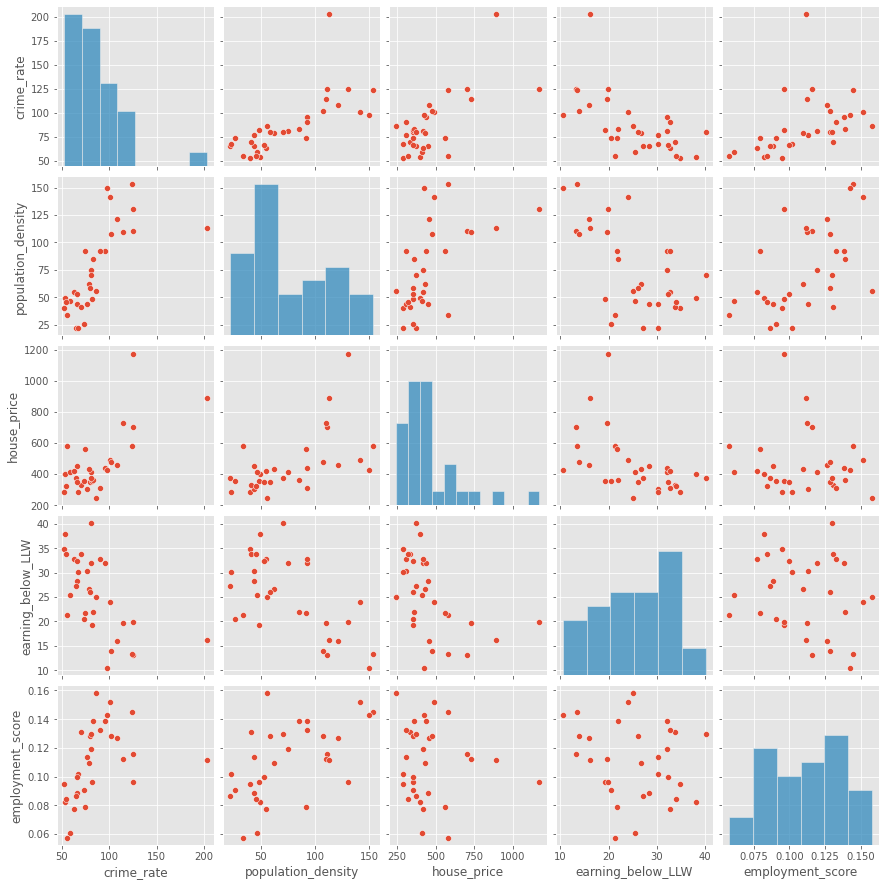

In [93]:
# Scatter plots
df = rawdata1
sn.pairplot(df[['crime_rate','population_density','house_price','earning_below_LLW','employment_score']])
plt.savefig("Pairplot.png")

## Heat map

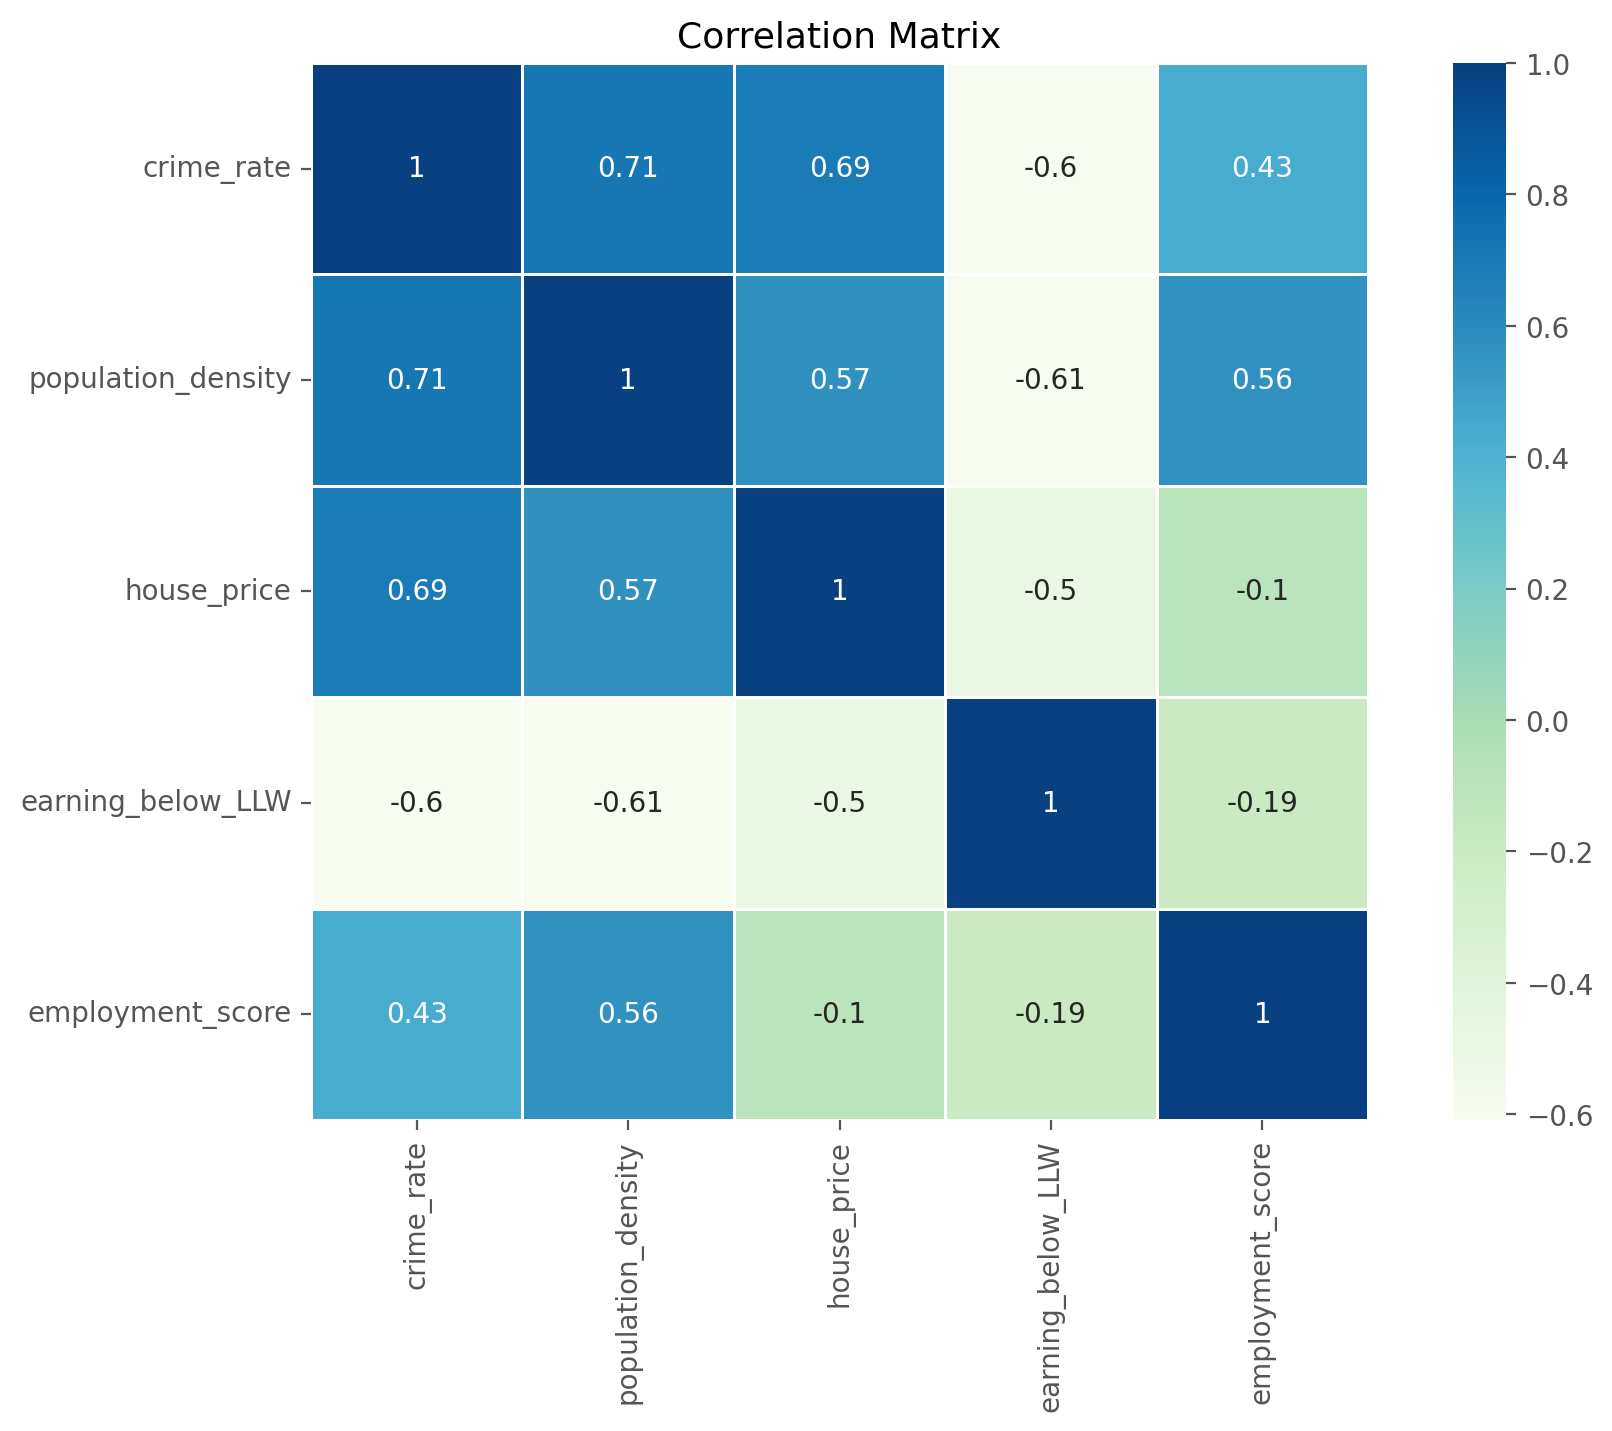

In [94]:
# Check the correlations
df = rawdata1
plt.figure(figsize=(11, 7),dpi=200)
plt.title('Correlation Matrix',fontdict={'fontsize':13})
sn.heatmap(df.corr(), 
           cmap='GnBu',
           vmax=1,
           square=True,
           annot=True,
           linewidths=.5)
plt.savefig("Correlation Matrix.png")

## Checking the correlation between variables(OLS)

In [95]:
# build the model, using this equation to formalute the regression model
# 'crime_rate ~ population_density + house_price + earning_belo_LLW + employment_score'
model_crime_rate = sm.formula.ols('crime_rate ~ population_density + house_price + earning_below_LLW + employment_score', df).fit()
model_crime_rate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     21.55
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           4.44e-08
Time:                        15:26:50   Log-Likelihood:                -130.84
No. Observations:                  32   AIC:                             271.7
Df Residuals:                      27   BIC:                             279.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.3828     24.387     -0.098      0.923     -52.421      47.655
population_density    -0.0853      0.148     -0.577      0.569      -0.389       0.218
house_price            0.1091      0.023      4.733      0.000       0.062       0.156
earning_below_LLW     -0.8448      0.470     -1.797      0.084      -1.810       0.120
employment_score     600.9811    167.698      3.584      0.001     256.894     945.068
==============================================================================
Omnibus:                       38.858   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.599
Skew:                           2.376   Prob(JB):                     9.01e-38
Kurtosis:                      13.265   Cond. No.                     3.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df.loc[:,['population_density', 'house_price', 'earning_below_LLW', 'employment_score']], df.crime_rate)

# The coefficients
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [-8.53202419e-02  1.09144664e-01 -8.44803752e-01  6.00981110e+02]


## Heteroscedasticity detection

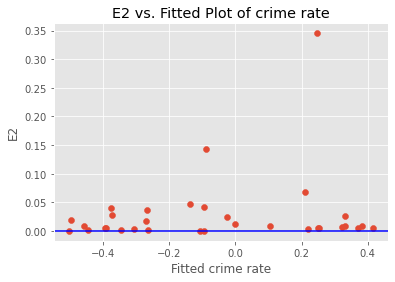

In [97]:
# Graphical test
res = model_crime_rate2.resid
fitted = model_crime_rate2.fittedvalues
e2 = res**2

plt.scatter(fitted, e2)
# adding title and labels
plt.xlabel('Fitted crime rate')
plt.ylabel('E2')
plt.title('E2 vs. Fitted Plot of crime rate')
plt.savefig("E2_vs_fit_crime_rate.png")
plt.axhline(y = 0, color = 'b',linestyle = '-')
plt.show()

In [98]:
# White test
import statsmodels.formula.api as smf

df2 = df
df2['resid_sq'] = model_crime_rate2.resid ** 2

reg_resid = smf.ols(formula='resid_sq ~ population_density*house_price*earning_below_LLW*employment_score+I(population_density**2)+I(house_price**2)+I(earning_below_LLW**2)+I(employment_score**2)-population_density:house_price:earning_below_LLW:employment_score', data=df2)
df2_resid = reg_resid.fit()
white_F_statistic = df2_resid.fvalue
white_F_pval = df2_resid.f_pvalue

print(f'F-statistic of white test: {white_F_statistic}')
print(f'Prob (F-statistic) of white test: {white_F_pval}')

F-statistic of white test: 2.3392019253988052
Prob (F-statistic) of white test: 0.061824266036670836


## Using VIF to deal with multicollinearity

In [99]:
# Check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

df_check = df[list(df.columns[3:])]
df_with_const = add_constant(df_check)

vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df

,VIF
population_density,4.3207
house_price,2.8302
earning_below_LLW,1.7370
employment_score,2.4647
resid_sq,1.2297


In [100]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly 
    the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [101]:
# Drop collinear variables
df_new = drop_column_using_vif_(df.drop(['Code','Area_name','crime_rate'],axis=1))

In [102]:
# None of columns were dropped
df_new.head()

,population_density,house_price,earning_below_LLW,employment_score,resid_sq
0,56.0455,245.5000,25.0000,0.1581,0.0091
1,43.7825,450.0000,28.3000,0.0887,0.0029
2,40.0078,285.0000,34.8000,0.0948,0.0078
3,75.1402,415.0000,32.0000,0.1192,0.0000
4,21.6747,375.0000,27.2000,0.0864,0.0008


In [103]:
# Check VIF again
df_with_const = add_constant(df_new)

vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
vif_df = vif_df.drop('const')
vif_df

,VIF
population_density,4.3207
house_price,2.8302
earning_below_LLW,1.7370
employment_score,2.4647
resid_sq,1.2297


## Standardization and Normalization (by wu)

## Building and interpreting a linear regression model

### Building the model

In [104]:
# using VIF on the dataset
df2 = rawdata2

df2_predictors_selected_VIF = df_new = drop_column_using_vif_(df2.drop(['Code','Area_name','crime_rate'],axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['population_density', 'house_price', 'earning_below_LLW',
       'employment_score'],
      dtype='object')


In [105]:
model_crime_rate2 = sm.OLS(endog=df2[['crime_rate']], exog=sm.add_constant(df2_predictors_selected_VIF)).fit()
model_crime_rate2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     21.25
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           5.14e-08
Time:                        15:26:53   Log-Likelihood:                 11.231
No. Observations:                  32   AIC:                            -12.46
Df Residuals:                      27   BIC:                            -5.132
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0226      0.033     -0.679      0.503      -0.091       0.046
population_density    -0.0216      0.126     -0.171      0.865      -0.281       0.237
house_price            0.4906      0.132      3.713      0.001       0.220       0.762
earning_below_LLW     -0.1778      0.078     -2.284      0.030      -0.338      -0.018
employment_score       0.4400      0.099      4.455      0.000       0.237       0.643
==============================================================================
Omnibus:                       11.759   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.382
Skew:                           0.911   Prob(JB):                     0.000753
Kurtosis:                       5.733   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual analysis

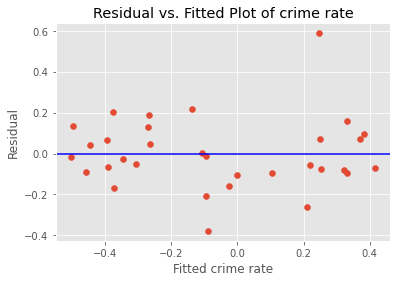

In [110]:
# Residual Analysis
plt.scatter(model_crime_rate2.fittedvalues, model_crime_rate2.resid)
# adding title and labels
plt.xlabel('Fitted crime rate')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of crime rate')
plt.savefig("Res_vs_fit_crime_rate.png")
plt.axhline(y = 0, color = 'b',linestyle = '-')
plt.show()

### Interpreting the model

The R-squared value is 0.759, meaning that 75.9% of the total variance of the crime rate can be explained by the variables used in the model.

## Adjusted R-squared

In [107]:
df2_predictors_adding_random = df2_predictors_selected_VIF
# using a seed to make the result reproducible
np.random.seed(420)
# adding 'totally_random', which is random noise and shows no relationship with the response variable
df2_predictors_adding_random['totally_random'] = np.random.normal(0,5,df2_predictors_adding_random.shape[0])
# the model without windspeed
model_crate_rate2_adding_random = sm.OLS(endog=df[['crime_rate']], exog=sm.add_constant(df2_predictors_adding_random)).fit()
model_crate_rate2_adding_random.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             crime_rate   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     8.103
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           0.000102
Time:                        15:26:53   Log-Likelihood:                -138.75
No. Observations:                  32   AIC:                             289.5
Df Residuals:                      26   BIC:                             298.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 89.5973      3.684     24.321      0.000      82.025      97.170
population_density    -7.2584     14.044     -0.517      0.610     -36.127      21.610
house_price           47.3490     14.615      3.240      0.003      17.307      77.392
earning_below_LLW     -8.8638      8.684     -1.021      0.317     -26.714       8.986
employment_score      30.4983     11.094      2.749      0.011       7.695      53.302
totally_random         1.2019      0.708      1.699      0.101      -0.253       2.656
==============================================================================
Omnibus:                       40.440   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.041
Skew:                           2.601   Prob(JB):                     1.07e-35
Kurtosis:                      12.681   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

(**TO BE COMFIRMED**)

Crime rates are positively correlated with population density, house prices and employment rates, and negatively correlated with the proportion of employees earning below the London Living Wage.